# ECE 657A - Assignment 2
**Date Submitted:** March 06, 2022

In [2]:
# Data Manipulation
import pandas as pd
import numpy as np

# Charting
import seaborn as sns
sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
from scipy import stats

# Misc
import warnings
warnings.filterwarnings("ignore")

#libraries
from IPython.display import display, Math, Latex
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from collections import Counter
from sklearn.decomposition import PCA
import altair as alt
from sklearn import tree
from matplotlib.cbook import boxplot_stats
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score


# 0. Preprocessed data

## 0.1. Abalone Dataset

In [4]:
# Columns/Features of Dataset
abalone_columns = ['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']

# Loading the Data set
abalone_df=pd.read_csv('abalone.csv',names=abalone_columns)

In [5]:
abalone_df['Sex'] = abalone_df['Sex'].replace(['M'],'0')
abalone_df['Sex'] = abalone_df['Sex'].replace(['F'],'1')
abalone_df['Sex'] = abalone_df['Sex'].replace(['I'],'2')

abalone_df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### 0.1.1. Z-score Normalization

In [6]:
# With Z-score Normalization
abalone_for_normalization = abalone_df.drop(columns=['Rings','Sex'])
abalone_zscore = abalone_for_normalization.apply(stats.zscore)
abalone_zscore['Sex'] = abalone_df['Sex']
abalone_zscore['Rings'] = abalone_df['Rings']
abalone_zscore.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex,Rings
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,0,15
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,0,7
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,1,9
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0,10
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,2,7


### 0.1.2. Min-max Normalization


In [7]:
#Minmax normalization
from sklearn.preprocessing import MinMaxScaler, StandardScaler

abalone_for_normalization = abalone_df.drop(columns=['Sex'])
cols = list(abalone_for_normalization.columns)
scaler_minmax = MinMaxScaler()
features_data_x = abalone_for_normalization.drop('Rings', axis = 1).values
target_y = abalone_for_normalization['Rings'].values
X_minmax = scaler_minmax.fit_transform(features_data_x)

In [8]:
#Dataframe of minmax normalized data
abalone_minmax = pd.DataFrame(data=np.column_stack((X_minmax, target_y)),columns=cols)
abalone_minmax['Sex'] = abalone_df['Sex']
abalone_minmax.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex
0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982,15.0,0
1,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261,7.0,0
2,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773,9.0,1
3,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965,10.0,0
4,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313,7.0,2


## 0.2. Wine Quality Data Set

In [9]:
#Columns/Features
wine_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
L = 'quality'
C = 'color'

#Loading Data set
wine_r = pd.read_csv("winequality-red.csv", sep=';')
#Loading Data set
wine_w = pd.read_csv("winequality-white.csv", sep=';')
wine_w= wine_w.copy()
wine_w[C]= np.zeros(wine_w.shape[0],dtype=int)
wine_r[C]= np.ones(wine_r.shape[0],dtype=int)
wine_df = pd.concat([wine_w,wine_r])
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


### 0.2.1. Z-score Normalization

In [10]:
# With Z-score Normalization
wine_zscore = wine_df.loc[:, ~wine_df.columns.isin(['quality', 'color'])].apply(stats.zscore)
wine_zscore["quality"] = wine_df["quality"]
wine_zscore["color"] = wine_df["color"]

wine_zscore.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,-0.166089,-0.423183,0.284686,3.206929,-0.314975,0.815565,0.959976,2.102214,-1.359049,-0.546178,-1.418558,6,0
1,-0.706073,-0.240949,0.147046,-0.807837,-0.200790,-0.931107,0.287618,-0.232332,0.506915,-0.277351,-0.831615,6,0
2,0.682458,-0.362438,0.559966,0.306208,-0.172244,-0.029599,-0.331660,0.134525,0.258120,-0.613385,-0.328521,6,0
3,-0.011808,-0.666161,0.009406,0.642523,0.056126,0.928254,1.243074,0.301278,-0.177272,-0.882212,-0.496219,6,0
4,-0.011808,-0.666161,0.009406,0.642523,0.056126,0.928254,1.243074,0.301278,-0.177272,-0.882212,-0.496219,6,0


### 0.2.2. Min-max Normalization


In [11]:
#Minmax normalization
wine_minmax = (wine_df-wine_df.min())/(wine_df.max()-wine_df.min())
wine_minmax["quality"] = wine_df["quality"]
wine_minmax["color"] = wine_df["color"]

wine_minmax.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,0.264463,0.126667,0.216867,0.308282,0.059801,0.152778,0.377880,0.267785,0.217054,0.129213,0.115942,6,0
1,0.206612,0.146667,0.204819,0.015337,0.066445,0.045139,0.290323,0.132832,0.449612,0.151685,0.217391,6,0
2,0.355372,0.133333,0.240964,0.096626,0.068106,0.100694,0.209677,0.154039,0.418605,0.123596,0.304348,6,0
3,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.414747,0.163678,0.364341,0.101124,0.275362,6,0
4,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.414747,0.163678,0.364341,0.101124,0.275362,6,0


## 0.3. KNN results

### 0.3.0. Functions

In [16]:
# Creating functions to generate a train-test split and analyzing the train test split
from sklearn.model_selection import train_test_split

def generate_train_test_splits(df,target):
    X = df.drop(target, axis = 1)
    y = df[target]

    # Train and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=27)
    return X_train, X_test, y_train, y_test

def analyze_train_test_splits(*args):
    for split in args:
        display(split.count())

In [17]:
# Defining wrapper functions for knn classification for reusability

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

# The below function accepts train-test splits, value of k, method(for weighted KNN) as "e"(euclidean) or "m"(manhattan) and returns accuracy
def knn_classify(X_train, X_test, y_train, y_test,n=None,method=None):
    knn_args = {}

    # Assessing the arguments
    if n is not None:
        knn_args['n_neighbors'] = n
    
    if method == "e":
        knn_args['weights'] = "distance"
        
    if method == "m":
        knn_args['weights'] = "distance"
        knn_args['metric'] = "manhattan"

    # Run KNN based upon arguments passed to the current function
    knn = KNeighborsClassifier(**knn_args) # Defining model
    knn.fit(X_train, y_train) # Running the model
    predictions = knn.predict(X_test) # Making predictions
    accuracy = accuracy_score(y_test,predictions) # Calculating accuracy
    return accuracy

# The below function is just to analyze the predictions, confusion matrix
def knn_analyze(predictions,y_test): 
    print("\n*** Confusion Matrix ***\n")
    print(confusion_matrix(y_test,predictions))
    
    print("\n*** Classification Report ***\n")
    print(classification_report(y_test,predictions))
    
    accuracy = accuracy_score(y_test,predictions)
    
    print("\n*** Accuracy ***\n")
    print(accuracy)

### 0.3.1. Abalone

In [13]:
# Using three datasets: unnormalized, zscore normalized and minmax normalized
abalone_dataframe_unnormal = abalone_df
abalone_dataframe_zscore = abalone_zscore
abalone_dataframe_minmax = abalone_minmax

abalone_target = "Rings" # Target variable

In [14]:
# Train, test set for zscore normalized
abalone_zscore_X_train, abalone_zscore_X_test, abalone_zscore_y_train, abalone_zscore_y_test = generate_train_test_splits(abalone_dataframe_zscore,abalone_target)
# Train, test set for minmax normalized
abalone_minmax_X_train, abalone_minmax_X_test, abalone_minmax_y_train, abalone_minmax_y_test = generate_train_test_splits(abalone_dataframe_minmax,abalone_target)

print("\n*** Analysis for zscore normalized ***\n")
analyze_train_test_splits(abalone_zscore_X_train, abalone_zscore_X_test, abalone_zscore_y_train, abalone_zscore_y_test)

print("\n*** Analysis for minmax normalized ***\n")
analyze_train_test_splits(abalone_minmax_X_train, abalone_minmax_X_test, abalone_minmax_y_train, abalone_minmax_y_test)


*** Analysis for zscore normalized ***



Length            3341
Diameter          3341
Height            3341
Whole weight      3341
Shucked weight    3341
Viscera weight    3341
Shell weight      3341
Sex               3341
dtype: int64

Length            836
Diameter          836
Height            836
Whole weight      836
Shucked weight    836
Viscera weight    836
Shell weight      836
Sex               836
dtype: int64

3341

836


*** Analysis for minmax normalized ***



Length            3341
Diameter          3341
Height            3341
Whole weight      3341
Shucked weight    3341
Viscera weight    3341
Shell weight      3341
Sex               3341
dtype: int64

Length            836
Diameter          836
Height            836
Whole weight      836
Shucked weight    836
Viscera weight    836
Shell weight      836
Sex               836
dtype: int64

3341

836

In [18]:
# Calculating accuracy for default value of k i.e. 5
abalone_zscore_accuracy = knn_classify(abalone_zscore_X_train, abalone_zscore_X_test, abalone_zscore_y_train, abalone_zscore_y_test)
abalone_minmax_accuracy = knn_classify(abalone_minmax_X_train, abalone_minmax_X_test, abalone_minmax_y_train, abalone_minmax_y_test)

In [19]:
print("Accuracy for zscore = {}".format(abalone_zscore_accuracy))
print("Accuracy for minmax = {}".format(abalone_minmax_accuracy))

Accuracy for zscore = 0.22009569377990432
Accuracy for minmax = 0.22009569377990432


In [20]:
#k_values = [1,5,10,15,20,25,30,35]
k_values = range(4,100)
abalone_zscore_accuracies = []
abalone_minmax_accuracies = []

for k in k_values:
    acc1 = knn_classify(abalone_zscore_X_train, abalone_zscore_X_test, abalone_zscore_y_train, abalone_zscore_y_test,k)
    acc2 = knn_classify(abalone_minmax_X_train, abalone_minmax_X_test, abalone_minmax_y_train, abalone_minmax_y_test,k)
    
    abalone_zscore_accuracies.append(acc1)
    abalone_minmax_accuracies.append(acc2)

# Multiplying accuracies by 100 for better comparison
abalone_zscore_accuracies = [x*100 for x in abalone_zscore_accuracies]
abalone_minmax_accuracies = [x*100 for x in abalone_minmax_accuracies]

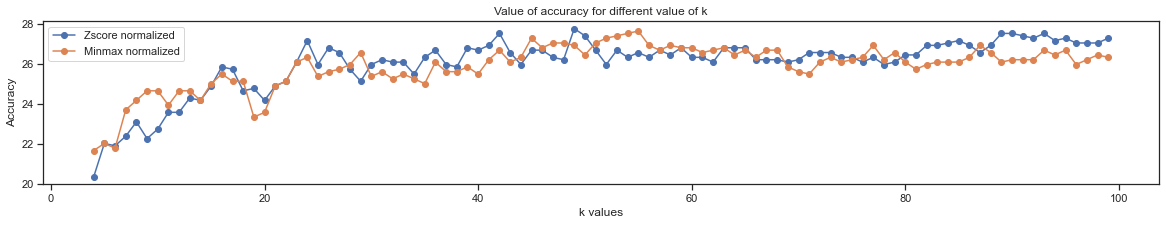

In [21]:
plt.figure(figsize=(20,3))
plt.plot(k_values, abalone_zscore_accuracies, marker='o')
plt.plot(k_values, abalone_minmax_accuracies, marker='o')

plt.xlabel("k values")
plt.ylabel("Accuracy")
plt.title("Value of accuracy for different value of k")
plt.legend(["Zscore normalized","Minmax normalized"])

In [22]:
# Finding the maximum accuracy
zscore_max_accuracy = max(abalone_zscore_accuracies)
minmax_max_accuracy = max(abalone_minmax_accuracies)

# Finding the best value of k
zscore_best_k = k_values[abalone_zscore_accuracies.index(zscore_max_accuracy)]
minmax_best_k = k_values[abalone_minmax_accuracies.index(minmax_max_accuracy)]

print("*** Best value of k for zscore = {} ***".format(zscore_best_k))
print("*** Best value of k for minmax = {} ***".format(minmax_best_k))

*** Best value of k for zscore = 49 ***
*** Best value of k for minmax = 55 ***


In [23]:
# Storing the accuracies for different k-values and different weighting parameters for zscore and minmax normalized data
abalone_zscore_accuracies_manhattan = []
abalone_zscore_accuracies_euclidean = []

abalone_minmax_accuracies_manhattan = []
abalone_minmax_accuracies_euclidean = []

# Using 'knn_classify' wrapper function defined above
for k in k_values:
    acc1_m = knn_classify(abalone_zscore_X_train, abalone_zscore_X_test, abalone_zscore_y_train, abalone_zscore_y_test,k,"m")
    acc1_e = knn_classify(abalone_zscore_X_train, abalone_zscore_X_test, abalone_zscore_y_train, abalone_zscore_y_test,k,"e")
    
    acc2_m = knn_classify(abalone_minmax_X_train, abalone_minmax_X_test, abalone_minmax_y_train, abalone_minmax_y_test,k,"m")
    acc2_e = knn_classify(abalone_minmax_X_train, abalone_minmax_X_test, abalone_minmax_y_train, abalone_minmax_y_test,k,"e")
    
    abalone_zscore_accuracies_manhattan.append(acc1_m)
    abalone_zscore_accuracies_euclidean.append(acc1_e)

    abalone_minmax_accuracies_manhattan.append(acc2_m)
    abalone_minmax_accuracies_euclidean.append(acc2_e)

In [24]:
# Multiplying accuracies by 100 for better comparison
abalone_zscore_accuracies_manhattan = [x*100 for x in abalone_zscore_accuracies_manhattan] 
abalone_zscore_accuracies_euclidean = [x*100 for x in abalone_zscore_accuracies_euclidean] 

abalone_minmax_accuracies_manhattan = [x*100 for x in abalone_minmax_accuracies_manhattan] 
abalone_minmax_accuracies_euclidean = [x*100 for x in abalone_minmax_accuracies_euclidean] 

*** Plot for Zscore normalized values ***


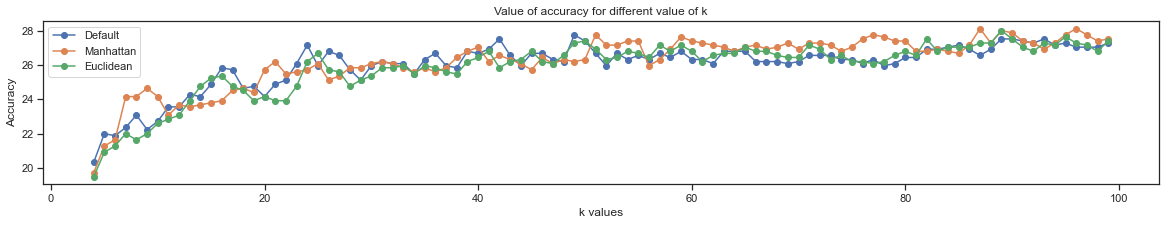

*** Plot for Minmax normalized values ***


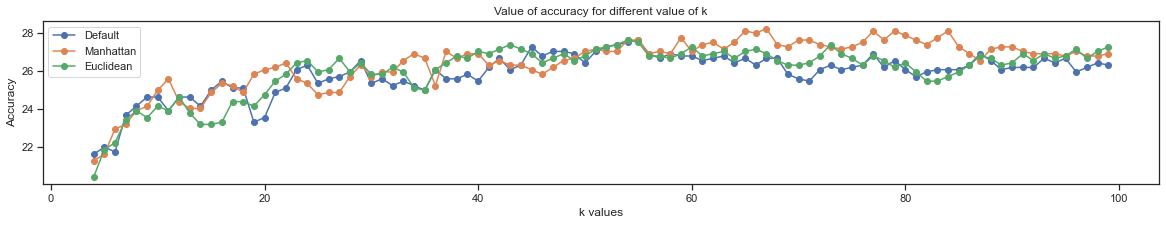

In [25]:
def accuracy_plot(default,manhattan,euclidean):
    plt.figure(figsize=(20,3))
    plt.plot(k_values, default, label='Default', marker='o')
    plt.plot(k_values, manhattan, label="Manhattan", marker='o')
    plt.plot(k_values, euclidean, label="Euclidean", marker='o')

    plt.xlabel("k values")
    plt.ylabel("Accuracy")
    plt.title("Value of accuracy for different value of k")
    plt.legend(["Default","Manhattan","Euclidean"])
    plt.show()

print("*** Plot for Zscore normalized values ***")
accuracy_plot(abalone_zscore_accuracies,abalone_zscore_accuracies_manhattan,abalone_zscore_accuracies_euclidean)

print("*** Plot for Minmax normalized values ***")
accuracy_plot(abalone_minmax_accuracies,abalone_minmax_accuracies_manhattan,abalone_minmax_accuracies_euclidean)

In [26]:
# Finding the maximum accuracy
zscore_max_accuracy_manhattan = max(abalone_zscore_accuracies_manhattan)
zscore_max_accuracy_euclidean = max(abalone_zscore_accuracies_euclidean)

print("*** Best accuracy from zscore = {} ***".format(max(zscore_max_accuracy,zscore_max_accuracy_manhattan,zscore_max_accuracy_euclidean)))

minmax_max_accuracy_manhattan = max(abalone_minmax_accuracies_manhattan)
minmax_max_accuracy_euclidean = max(abalone_minmax_accuracies_euclidean)

print("*** Best accuracy from minmax = {} ***".format(max(minmax_max_accuracy,minmax_max_accuracy_manhattan,minmax_max_accuracy_euclidean)))

# Finding the best value of k
zscore_best_k_manhattan = k_values[abalone_zscore_accuracies_manhattan.index(zscore_max_accuracy_manhattan)]
zscore_best_k_euclidean = k_values[abalone_zscore_accuracies_euclidean.index(zscore_max_accuracy_euclidean)]

minmax_best_k_manhattan = k_values[abalone_minmax_accuracies_manhattan.index(minmax_max_accuracy_manhattan)]
minmax_best_k_euclidean = k_values[abalone_minmax_accuracies_euclidean.index(minmax_max_accuracy_euclidean)]

print("*** Best value of k for zscore for manhattan distance metric= {} ***".format(zscore_best_k_manhattan))
print("*** Best value of k for zscore for euclidean distance metric= {} ***".format(zscore_best_k_euclidean))

print("*** Best value of k for minmax for manhattan distance metric= {} ***".format(minmax_best_k_manhattan))
print("*** Best value of k for minmax for euclidean distance metric= {} ***".format(minmax_best_k_euclidean))

*** Best accuracy from zscore = 28.11004784688995 ***
*** Best accuracy from minmax = 28.22966507177033 ***
*** Best value of k for zscore for manhattan distance metric= 87 ***
*** Best value of k for zscore for euclidean distance metric= 89 ***
*** Best value of k for minmax for manhattan distance metric= 67 ***
*** Best value of k for minmax for euclidean distance metric= 54 ***


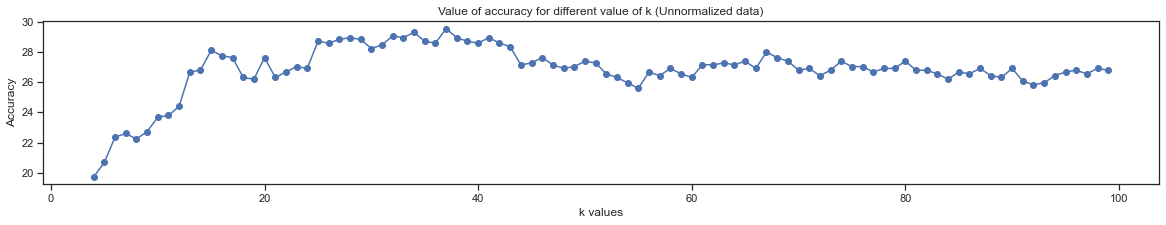

*** Plot for Unnormalized values ***


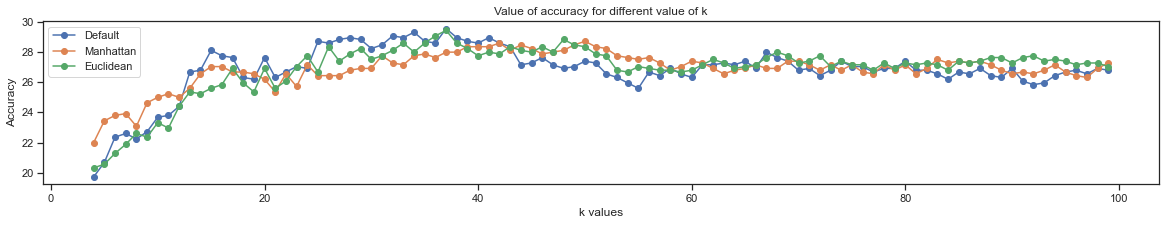

In [27]:
# Splitting unnormalized data into training and testing set
abalone_unnormal_X_train, abalone_unnormal_X_test, abalone_unnormal_y_train, abalone_unnormal_y_test = generate_train_test_splits(abalone_dataframe_unnormal,abalone_target)

# Calculating accuracy
abalone_unnormal_accuracy = knn_classify(abalone_unnormal_X_train, abalone_unnormal_X_test, abalone_unnormal_y_train, abalone_unnormal_y_test)

abalone_unnormal_accuracies = []
for k in k_values:
    acc1 = knn_classify(abalone_unnormal_X_train, abalone_unnormal_X_test, abalone_unnormal_y_train, abalone_unnormal_y_test,k)
    abalone_unnormal_accuracies.append(acc1)    
    
abalone_unnormal_accuracies = [x*100 for x in abalone_unnormal_accuracies]
plt.figure(figsize=(20,3))
plt.plot(k_values, abalone_unnormal_accuracies, marker='o')
plt.title("Value of accuracy for different value of k (Unnormalized data)")
plt.xlabel("k values")
plt.ylabel("Accuracy")
plt.show()

# Trying manhatten and euclidean metrics for unnormalized data
abalone_unnormal_accuracies_manhattan = []
abalone_unnormal_accuracies_euclidean = []

for k in k_values:
    acc1_m = knn_classify(abalone_unnormal_X_train, abalone_unnormal_X_test, abalone_unnormal_y_train, abalone_unnormal_y_test,k,"m")
    acc1_e = knn_classify(abalone_unnormal_X_train, abalone_unnormal_X_test, abalone_unnormal_y_train, abalone_unnormal_y_test,k,"e")
    abalone_unnormal_accuracies_manhattan.append(acc1_m)
    abalone_unnormal_accuracies_euclidean.append(acc1_e)

abalone_unnormal_accuracies_manhattan = [x*100 for x in abalone_unnormal_accuracies_manhattan] 
abalone_unnormal_accuracies_euclidean = [x*100 for x in abalone_unnormal_accuracies_euclidean]

print("*** Plot for Unnormalized values ***")
accuracy_plot(abalone_unnormal_accuracies,abalone_unnormal_accuracies_manhattan,abalone_unnormal_accuracies_euclidean)

In [28]:
# Finding the maximum accuracy
unnormal_max_accuracy = max(abalone_unnormal_accuracies)
unnormal_max_accuracy_manhattan = max(abalone_unnormal_accuracies_manhattan)
unnormal_max_accuracy_euclidean = max(abalone_unnormal_accuracies_euclidean)

print("*** Best accuracy from unnormalized data = {} ***".format(max(unnormal_max_accuracy,unnormal_max_accuracy_manhattan,unnormal_max_accuracy_euclidean)))

# Finding the best value of k
unnormal_best_k = k_values[abalone_unnormal_accuracies.index(unnormal_max_accuracy)]
unnormal_best_k_manhattan = k_values[abalone_unnormal_accuracies_manhattan.index(unnormal_max_accuracy_manhattan)]
unnormal_best_k_euclidean = k_values[abalone_unnormal_accuracies_euclidean.index(unnormal_max_accuracy_euclidean)]

print("*** Best value of k for unnormalized distance metric= {} ***".format(unnormal_best_k))
print("*** Best value of k for unnormalized for manhattan distance metric= {} ***".format(unnormal_best_k_manhattan))
print("*** Best value of k for unnormalized for euclidean distance metric= {} ***".format(unnormal_best_k_euclidean))

*** Best accuracy from unnormalized data = 29.545454545454547 ***
*** Best value of k for unnormalized distance metric= 37 ***
*** Best value of k for unnormalized for manhattan distance metric= 50 ***
*** Best value of k for unnormalized for euclidean distance metric= 37 ***


Conclusion: <br>
Best accuracy from zscore = 26.674641148325357 <br>
Best accuracy from minmax = 26.794258373205743<br>
Best accuracy from unnormalized data = 28.708133971291865<br>

**It is evident that we are achieving more accuracy with unnormalized value therefore normalization is not effective here**

### 0.3.2. Wine

In [29]:
wine_target = "quality"

# Shuffle the wine dataset because the dataset would be divided into 2 parts: one for red wine and other for white wine(while concatenation)
wine = wine_df.sample(frac=1).reset_index(drop=True)

# Using three datasets: unnormalized, zscore normalized and minmax normalized target variable 'quality'
wine_dataframe_unnormal = wine_df
wine_dataframe_zscore = wine_zscore
wine_dataframe_minmax = wine_minmax

In [30]:
''' Quality '''
# Train, test set for zscore and minmax normalized
wine_zscore_X_train, wine_zscore_X_test, wine_zscore_y_train, wine_zscore_y_test = generate_train_test_splits(wine_dataframe_zscore,wine_target)
wine_minmax_X_train, wine_minmax_X_test, wine_minmax_y_train, wine_minmax_y_test = generate_train_test_splits(wine_dataframe_minmax,wine_target)

print("\n*** Analysis for zscore normalized ***\n")
analyze_train_test_splits(wine_zscore_X_train, wine_zscore_X_test, wine_zscore_y_train, wine_zscore_y_test)
print("\n*** Analysis for minmax normalized ***\n")
analyze_train_test_splits(wine_minmax_X_train, wine_minmax_X_test, wine_minmax_y_train, wine_minmax_y_test)


*** Analysis for zscore normalized ***



fixed acidity           5197
volatile acidity        5197
citric acid             5197
residual sugar          5197
chlorides               5197
free sulfur dioxide     5197
total sulfur dioxide    5197
density                 5197
pH                      5197
sulphates               5197
alcohol                 5197
color                   5197
dtype: int64

fixed acidity           1300
volatile acidity        1300
citric acid             1300
residual sugar          1300
chlorides               1300
free sulfur dioxide     1300
total sulfur dioxide    1300
density                 1300
pH                      1300
sulphates               1300
alcohol                 1300
color                   1300
dtype: int64

5197

1300


*** Analysis for minmax normalized ***



fixed acidity           5197
volatile acidity        5197
citric acid             5197
residual sugar          5197
chlorides               5197
free sulfur dioxide     5197
total sulfur dioxide    5197
density                 5197
pH                      5197
sulphates               5197
alcohol                 5197
color                   5197
dtype: int64

fixed acidity           1300
volatile acidity        1300
citric acid             1300
residual sugar          1300
chlorides               1300
free sulfur dioxide     1300
total sulfur dioxide    1300
density                 1300
pH                      1300
sulphates               1300
alcohol                 1300
color                   1300
dtype: int64

5197

1300

In [31]:
# Calculating accuracy for default value of k i.e. 5 using 'knn_classify' wrapper function defined in abalone KNN section
wine_zscore_accuracy = knn_classify(wine_zscore_X_train, wine_zscore_X_test, wine_zscore_y_train, wine_zscore_y_test)
wine_minmax_accuracy = knn_classify(wine_minmax_X_train, wine_minmax_X_test, wine_minmax_y_train, wine_minmax_y_test)

In [32]:
print("*** For Quality ***")
print("Accuracy for zscore = {}".format(wine_zscore_accuracy))
print("Accuracy for minmax = {}".format(wine_minmax_accuracy))

*** For Quality ***
Accuracy for zscore = 0.5592307692307692
Accuracy for minmax = 0.5646153846153846


In [43]:
#k_values = [5,10,15,20,25,30,35]
k_values = range(4,100)
wine_zscore_accuracies = []
wine_minmax_accuracies = []

for k in k_values:
    acc1 = knn_classify(wine_zscore_X_train, wine_zscore_X_test, wine_zscore_y_train, wine_zscore_y_test,k)
    acc2 = knn_classify(wine_minmax_X_train, wine_minmax_X_test, wine_minmax_y_train, wine_minmax_y_test,k)
    
    wine_zscore_accuracies.append(acc1)
    wine_minmax_accuracies.append(acc2)

# Multiplying accuracies by 100 for better comparison
wine_zscore_accuracies = [x*100 for x in wine_zscore_accuracies]
wine_minmax_accuracies = [x*100 for x in wine_minmax_accuracies]

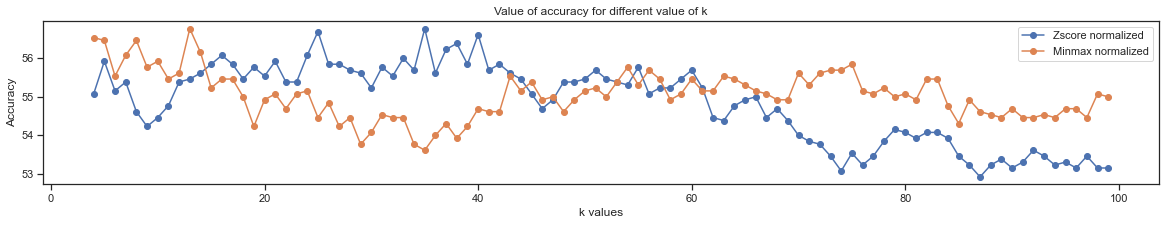

In [44]:
plt.figure(figsize=(20,3))
plt.plot(k_values, wine_zscore_accuracies, marker='o')
plt.plot(k_values, wine_minmax_accuracies, marker='o')

plt.xlabel("k values")
plt.ylabel("Accuracy")
plt.title("Value of accuracy for different value of k")
plt.legend(["Zscore normalized","Minmax normalized"])
plt.show()

In [45]:
# Finding the maximum accuracy
quality_zscore_max_accuracy = max(wine_zscore_accuracies)
quality_minmax_max_accuracy = max(wine_minmax_accuracies)

# Finding the best value of k
quality_zscore_best_k = k_values[wine_zscore_accuracies.index(quality_zscore_max_accuracy)]
quality_minmax_best_k = k_values[wine_minmax_accuracies.index(quality_minmax_max_accuracy)]

print("*** [Quality] Best value of k for zscore = {} ***".format(quality_zscore_best_k))
print("*** [Quality] Best value of k for minmax = {} ***".format(quality_minmax_best_k))

*** [Quality] Best value of k for zscore = 35 ***
*** [Quality] Best value of k for minmax = 13 ***


In [46]:
## Storing the accuracies for different k-values and different weighting parameters
wine_zscore_accuracies_manhattan = []
wine_zscore_accuracies_euclidean = []
wine_minmax_accuracies_manhattan = []
wine_minmax_accuracies_euclidean = []

# Using 'knn_classify' wrapper function defined above
for k in k_values:
    ''' Quality '''
    acc1_m = knn_classify(wine_zscore_X_train, wine_zscore_X_test, wine_zscore_y_train, wine_zscore_y_test,k,"m")
    acc1_e = knn_classify(wine_zscore_X_train, wine_zscore_X_test, wine_zscore_y_train, wine_zscore_y_test,k,"e")
    
    acc2_m = knn_classify(wine_minmax_X_train, wine_minmax_X_test, wine_minmax_y_train, wine_minmax_y_test,k,"m")
    acc2_e = knn_classify(wine_minmax_X_train, wine_minmax_X_test, wine_minmax_y_train, wine_minmax_y_test,k,"e")
    
    wine_zscore_accuracies_manhattan.append(acc1_m)
    wine_zscore_accuracies_euclidean.append(acc1_e)

    wine_minmax_accuracies_manhattan.append(acc2_m)
    wine_minmax_accuracies_euclidean.append(acc2_e)

In [47]:
# Multiplying accuracies by 100 for better comparison
wine_zscore_accuracies_manhattan = [x*100 for x in wine_zscore_accuracies_manhattan] 
wine_zscore_accuracies_euclidean = [x*100 for x in wine_zscore_accuracies_euclidean] 
wine_minmax_accuracies_manhattan = [x*100 for x in wine_minmax_accuracies_manhattan] 
wine_minmax_accuracies_euclidean = [x*100 for x in wine_minmax_accuracies_euclidean]

*** Plot for Zscore normalized values (Quality) ***


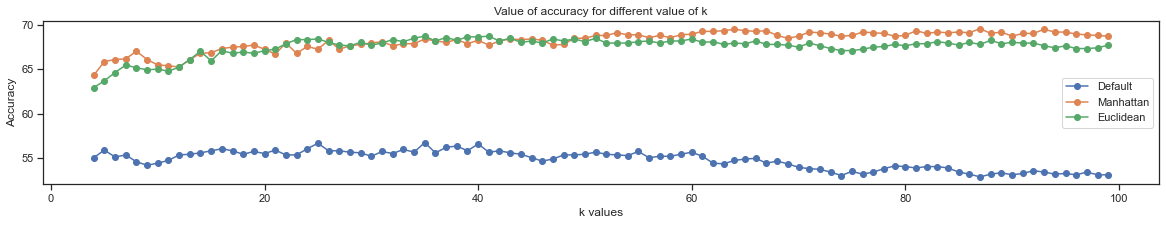

*** Plot for Minmax normalized values (Quality) ***


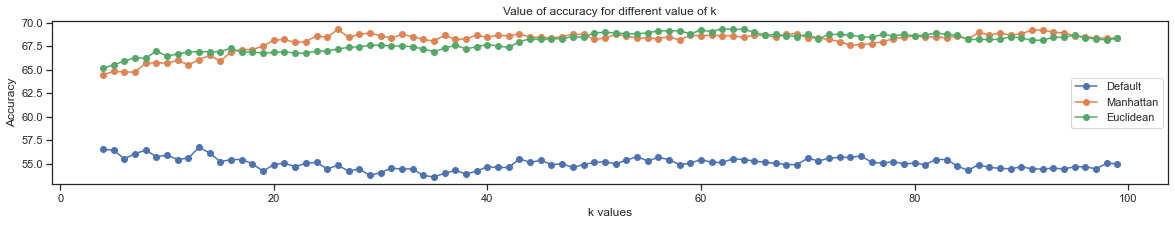

In [48]:
def accuracy_plot(default,manhattan,euclidean):
    plt.figure(figsize=(20,3))
    plt.plot(k_values, default, label='Default', marker='o')
    plt.plot(k_values, manhattan, label="Manhattan", marker='o')
    plt.plot(k_values, euclidean, label="Euclidean", marker='o')

    plt.xlabel("k values")
    plt.ylabel("Accuracy")
    plt.title("Value of accuracy for different value of k")
    plt.legend(["Default","Manhattan","Euclidean"])
    plt.show()

print("*** Plot for Zscore normalized values (Quality) ***")
accuracy_plot(wine_zscore_accuracies,wine_zscore_accuracies_manhattan,wine_zscore_accuracies_euclidean)
print("*** Plot for Minmax normalized values (Quality) ***")
accuracy_plot(wine_minmax_accuracies,wine_minmax_accuracies_manhattan,wine_minmax_accuracies_euclidean)

In [49]:
# ***** Finding the maximum accuracy

''' Quality '''
quality_zscore_max_accuracy_manhattan = max(wine_zscore_accuracies_manhattan)
quality_zscore_max_accuracy_euclidean = max(wine_zscore_accuracies_euclidean)

print("*** [Quality] Best accuracy from zscore = {} ***".format(max(quality_zscore_max_accuracy,quality_zscore_max_accuracy_manhattan,quality_zscore_max_accuracy_euclidean)))

quality_minmax_max_accuracy_manhattan = max(wine_minmax_accuracies_manhattan)
quality_minmax_max_accuracy_euclidean = max(wine_minmax_accuracies_euclidean)

print("*** [Quality] Best accuracy from minmax = {} ***".format(max(quality_minmax_max_accuracy,quality_minmax_max_accuracy_manhattan,quality_minmax_max_accuracy_euclidean)))

print("\n")
# ***** Finding the best value of k

''' Quality '''
quality_zscore_best_k_manhattan = k_values[wine_zscore_accuracies_manhattan.index(quality_zscore_max_accuracy_manhattan)]
quality_zscore_best_k_euclidean = k_values[wine_zscore_accuracies_euclidean.index(quality_zscore_max_accuracy_euclidean)]

quality_minmax_best_k_manhattan = k_values[wine_minmax_accuracies_manhattan.index(quality_minmax_max_accuracy_manhattan)]
quality_minmax_best_k_euclidean = k_values[wine_minmax_accuracies_euclidean.index(quality_minmax_max_accuracy_euclidean)]

print("*** [Quality] Best value of k for zscore for manhattan distance metric= {} ***".format(quality_zscore_best_k_manhattan))
print("*** [Quality] Best value of k for zscore for euclidean distance metric= {} ***".format(quality_zscore_best_k_euclidean))

print("*** [Quality] Best value of k for minmax for manhattan distance metric= {} ***".format(quality_minmax_best_k_manhattan))
print("*** [Quality] Best value of k for minmax for euclidean distance metric= {} ***".format(quality_minmax_best_k_euclidean))

*** [Quality] Best accuracy from zscore = 69.53846153846153 ***
*** [Quality] Best accuracy from minmax = 69.38461538461539 ***


*** [Quality] Best value of k for zscore for manhattan distance metric= 87 ***
*** [Quality] Best value of k for zscore for euclidean distance metric= 35 ***
*** [Quality] Best value of k for minmax for manhattan distance metric= 26 ***
*** [Quality] Best value of k for minmax for euclidean distance metric= 62 ***


*** Quality ***


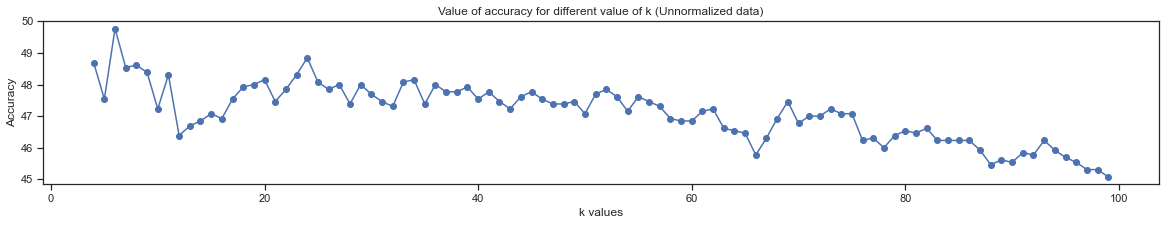

*** Plot for Unnormalized values ***


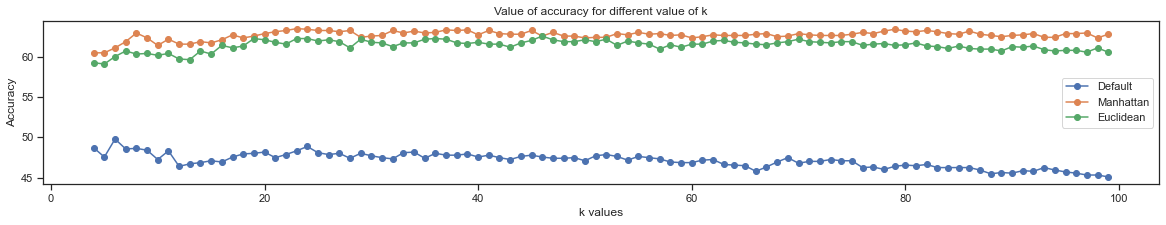

In [50]:
print("*** Quality ***")
# Splitting unnormalized data into training and testing set
wine_unnormal_X_train, wine_unnormal_X_test, wine_unnormal_y_train, wine_unnormal_y_test = generate_train_test_splits(wine_dataframe_unnormal,wine_target)
# Calculating accuracy
wine_unnormal_accuracy = knn_classify(wine_unnormal_X_train, wine_unnormal_X_test, wine_unnormal_y_train, wine_unnormal_y_test)

wine_unnormal_accuracies = []
for k in k_values:
    acc1 = knn_classify(wine_unnormal_X_train, wine_unnormal_X_test, wine_unnormal_y_train, wine_unnormal_y_test,k)
    wine_unnormal_accuracies.append(acc1)    
    
wine_unnormal_accuracies = [x*100 for x in wine_unnormal_accuracies]
plt.figure(figsize=(20,3))
plt.plot(k_values, wine_unnormal_accuracies, marker='o')
plt.xlabel("k values")
plt.ylabel("Accuracy")
plt.title("Value of accuracy for different value of k (Unnormalized data)")
plt.show()

# Trying manhatten and euclidean metrics for unnormalized data
wine_unnormal_accuracies_manhattan = []
wine_unnormal_accuracies_euclidean = []

for k in k_values:
    acc1_m = knn_classify(wine_unnormal_X_train, wine_unnormal_X_test, wine_unnormal_y_train, wine_unnormal_y_test,k,"m")
    acc1_e = knn_classify(wine_unnormal_X_train, wine_unnormal_X_test, wine_unnormal_y_train, wine_unnormal_y_test,k,"e")
    wine_unnormal_accuracies_manhattan.append(acc1_m)
    wine_unnormal_accuracies_euclidean.append(acc1_e)

wine_unnormal_accuracies_manhattan = [x*100 for x in wine_unnormal_accuracies_manhattan] 
wine_unnormal_accuracies_euclidean = [x*100 for x in wine_unnormal_accuracies_euclidean]

print("*** Plot for Unnormalized values ***")
accuracy_plot(wine_unnormal_accuracies,wine_unnormal_accuracies_manhattan,wine_unnormal_accuracies_euclidean)

In [42]:
''' Quality '''
print("*** Quality ***")
# Finding the maximum accuracy
unnormal_max_accuracy = max(wine_unnormal_accuracies)
unnormal_max_accuracy_manhattan = max(wine_unnormal_accuracies_manhattan)
unnormal_max_accuracy_euclidean = max(wine_unnormal_accuracies_euclidean)

print("*** Best accuracy from unnormalized data = {} ***".format(max(unnormal_max_accuracy,unnormal_max_accuracy_manhattan,unnormal_max_accuracy_euclidean)))

# Finding the best value of k
unnormal_best_k = k_values[wine_unnormal_accuracies.index(unnormal_max_accuracy)]
unnormal_best_k_manhattan = k_values[wine_unnormal_accuracies_manhattan.index(unnormal_max_accuracy_manhattan)]
unnormal_best_k_euclidean = k_values[wine_unnormal_accuracies_euclidean.index(unnormal_max_accuracy_euclidean)]

print("*** Best value of k for unnormalized distance metric= {} ***".format(unnormal_best_k))
print("*** Best value of k for unnormalized for manhattan distance metric= {} ***".format(unnormal_best_k_manhattan))
print("*** Best value of k for unnormalized for euclidean distance metric= {} ***".format(unnormal_best_k_euclidean))

*** Quality ***
*** Best accuracy from unnormalized data = 63.23076923076923 ***
*** Best value of k for unnormalized distance metric= 20 ***
*** Best value of k for unnormalized for manhattan distance metric= 25 ***
*** Best value of k for unnormalized for euclidean distance metric= 35 ***


Conclusion: <br><br>
[For quality]<br>
Best accuracy from zscore = 68.61538461538461 <br>
Best accuracy from minmax = 68.6923076923077<br>
Best accuracy from unnormalized data = 61.15384615384616<br>
<br>
[For color]<br>
Best accuracy from zscore = 99.76923076923076 <br>
Best accuracy from minmax = 99.53846153846155<br>
Best accuracy from unnormalized data = 97.15384615384616<br>
**It is evident that we are achieving more accuracy with normalized value therefore normalization is effective here**

# Representation Learning 

## 1. PCA

## Abalone Dataset

total variance 1.0


Text(0, 0.5, 'explained_variance_ratio')

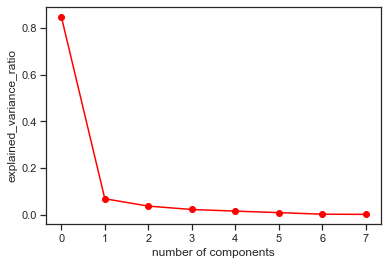

In [53]:
df_abalone_target = abalone_zscore['Rings']
df_abalone_prePCA = abalone_zscore.drop(columns=['Rings'])
pca = PCA(n_components=8).fit(df_abalone_prePCA)
plt.plot(pca.explained_variance_ratio_, marker = 'o',color='red')
scores=pca.explained_variance_ratio_
s=scores.sum()
print('total variance',s)
plt.xlabel('number of components')
plt.ylabel('explained_variance_ratio')


In [45]:
arr=[]
for x in range(1,9):
    x="%s" %x
    a = 'PC' + x
    arr.append(a)

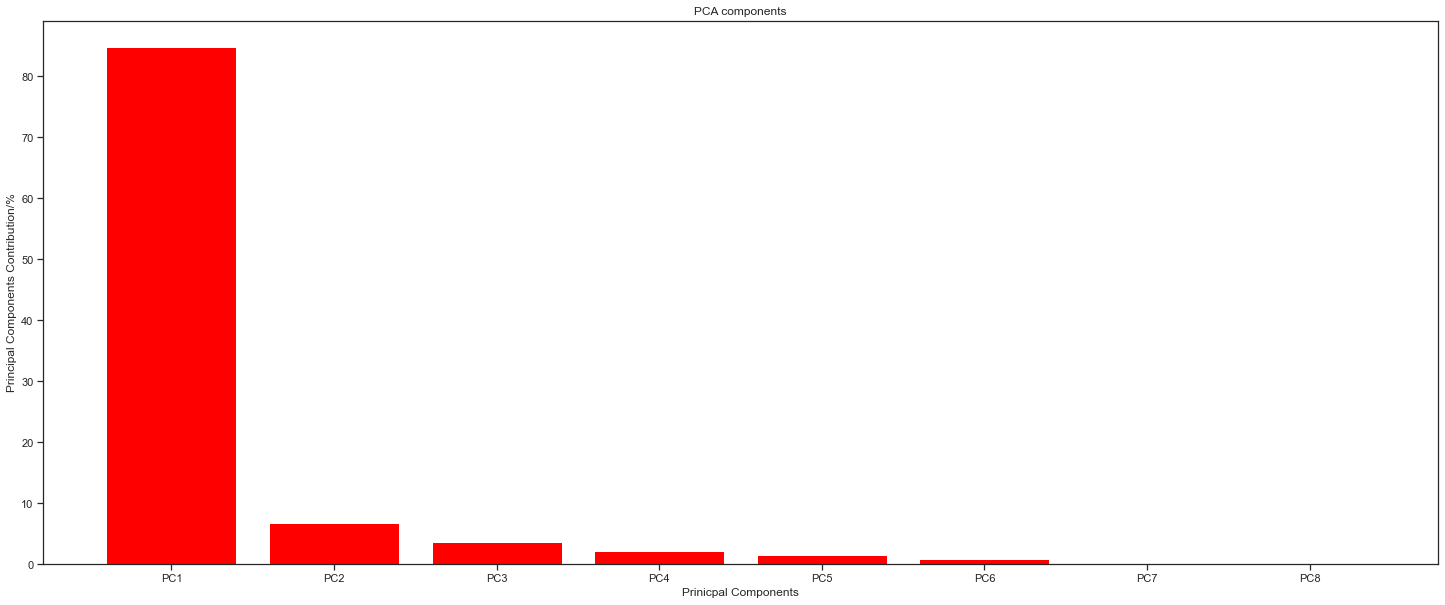

In [54]:
plt.figure(figsize=(25,10))
plt.bar(arr, pca.explained_variance_ratio_*100 , color ='red')
plt.xlabel("Prinicpal Components")
plt.ylabel("Principal Components Contribution/%")
plt.title("PCA components")
plt.show()

In [49]:
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(df_abalone_prePCA)
principalDf_abalone = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2','PC3','PC4'])
principalDf_abalone.shape


(4177, 4)

In [50]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_*100)
print(pca.explained_variance_ratio_.cumsum())

[6.5208753  0.52129955 0.27935755 0.1673836 ]
[84.83042547  6.78161446  3.63417773  2.17750248]
[0.84830425 0.9161204  0.95246218 0.9742372 ]


In [51]:
principalDf_abalone['Rings']=df_abalone_target
principalDf_abalone.shape

(4177, 5)

In [55]:
principalDf_abalone.isnull().sum()

PC1      0
PC2      0
PC3      0
PC4      0
Rings    0
dtype: int64

## 3. Decision Tree Classifier

In [ ]:
plot_list=[2,3,4,5,6,7,8,9,10,20,30,40,50,100,150]
def dtree_grid_search(X,y,nfolds):
    #create a dictionary of all values we want to test
    param_grid = {'max_depth': plot_list}
    # decision tree model
    dtree_model=DecisionTreeClassifier()
    #use gridsearch to test all values
    dtree_gscv = GridSearchCV(dtree_model, param_grid, cv=nfolds)
    #fit model to data
    dtree_gscv.fit(X, y)
    return dtree_gscv.cv_results_

### Wine dataset (Raw)

In [ ]:
result=dtree_grid_search(df_minMax, y_quality,5)
mean_score=result['mean_test_score']
plt.figure(figsize=(12,8))
plt.plot(plot_list,mean_score,color = 'green',linestyle='dashed', 
         marker='o',markerfacecolor='blue', markersize=10,label="Mean Test Score")
plt.title('Mean Test Score vs. Depth of Tree')
plt.xlabel('Depth of Tree')
plt.ylabel('Mean Test Score')
plt.legend()
plt.title("Mean Test Score vs. Depth of Tree")

## 4. Random Forest Classifier